In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("D:\\Dataset.csv")

In [ ]:
df.head()

,Time,Evapotranspiration mm sum,FAO Reference Evapotranspiration mm sum,Temperature °C max,Temperature °C min,Temperature °C mean,Soil Temperature °C max,Soil Temperature °C min,Soil Temperature °C mean,Soil Moisture m³/m³ max,...,Wind Gust sfc km/h min,Wind Gust sfc km/h mean,Wind Speed 900 mb km/h max,Wind Speed 900 mb km/h min,Wind Speed 900 mb km/h mean,Wind Direction Dominant 900 mb °,Wind Speed 850 mb km/h max,Wind Speed 850 mb km/h min,Wind Speed 850 mb km/h mean,Wind Direction Dominant 850 mb °
0,01-01-2010,2.301120,3.319749,42.54,22.17,29.290419,33.149994,25.880005,28.909166,0.312,...,0.72,5.400000,8.404284,0.720000,4.773096,72.739230,15.038350,4.213692,10.906757,68.819570
1,02-01-2010,3.186721,3.991358,40.80,20.46,29.045418,32.800020,24.110016,28.498755,0.313,...,0.72,5.295000,10.823973,0.804984,5.012135,83.990990,14.578888,1.297998,9.536324,72.206170
2,03-01-2010,2.782080,3.365685,41.07,24.24,29.570417,32.070007,26.110016,28.940016,0.304,...,0.72,6.015000,8.473393,0.720000,3.766854,23.014755,13.551501,1.440000,6.951989,50.355820
3,04-01-2010,3.091680,3.996378,40.99,23.47,29.407915,32.890015,25.880005,28.813340,0.299,...,1.08,5.160000,9.366919,1.138420,4.865378,40.440033,14.039999,2.811690,7.925127,58.671295
4,05-01-2010,2.917440,3.910580,40.38,22.10,28.589582,32.760010,25.270020,28.305841,0.293,...,0.72,4.514999,9.000000,1.800000,5.762703,28.148193,15.815435,2.414954,10.231100,53.832962


In [ ]:
df.isnull().sum()

Time                                       0
Evapotranspiration mm sum                  0
FAO Reference Evapotranspiration mm sum    0
Temperature °C max                         0
Temperature °C min                         0
                                          ..
Wind Direction Dominant 900 mb °           0
Wind Speed 850 mb km/h max                 0
Wind Speed 850 mb km/h min                 0
Wind Speed 850 mb km/h mean                0
Wind Direction Dominant 850 mb °           0
Length: 65, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix_1= numerical_columns.corr()

# Determine the number of numerical features
num_features = len(numerical_columns.columns)

# Set figsize based on the number of features
figsize = (max(8, num_features/2), max(6, num_features/2))

# Create a heatmap
plt.figure(figsize=figsize)  # Adjust the figure size if needed
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%d-%m-%Y')

# Filter the dataset for June to October
df_filtered = df[(df['Time'].dt.month >= 6) & (df['Time'].dt.month <= 10)]

In [ ]:
df_filtered.describe()

,Time,Evapotranspiration mm sum,FAO Reference Evapotranspiration mm sum,Temperature °C max,Temperature °C min,Temperature °C mean,Soil Temperature °C max,Soil Temperature °C min,Soil Temperature °C mean,Soil Moisture m³/m³ max,...,Wind Gust sfc km/h min,Wind Gust sfc km/h mean,Wind Speed 900 mb km/h max,Wind Speed 900 mb km/h min,Wind Speed 900 mb km/h mean,Wind Direction Dominant 900 mb °,Wind Speed 850 mb km/h max,Wind Speed 850 mb km/h min,Wind Speed 850 mb km/h mean,Wind Direction Dominant 850 mb °
count,2142,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,...,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000
mean,2017-02-14 05:08:34.285714176,1.592291,2.381193,34.667923,23.426503,27.447905,31.068288,25.167079,27.620623,0.321207,...,8.022017,13.538984,28.867823,16.921357,22.778930,268.126173,40.069688,26.877768,33.146334,268.101411
min,2010-06-01 00:00:00,0.000000,0.532805,24.340000,18.540000,23.580414,24.880005,22.000000,24.221670,0.143000,...,0.000000,2.820000,5.052841,0.000000,2.821830,0.710236,4.553680,0.000000,1.729665,1.378830
25%,2013-08-16 06:00:00,1.166400,1.541488,29.720000,22.740000,26.118542,28.779999,24.640015,26.554695,0.287000,...,3.960000,9.705000,22.319998,12.241323,17.451956,265.576565,27.718226,14.525435,21.236009,277.979247
50%,2017-02-14 12:00:00,1.533600,2.123232,33.220000,23.670000,27.207708,30.745010,25.170013,27.517924,0.326000,...,7.920000,13.110000,29.705997,18.000000,24.045479,286.215120,41.870022,29.394608,35.398121,296.193615
75%,2020-08-15 18:00:00,1.950840,3.063982,39.670000,24.240000,28.562812,33.237518,25.700012,28.571463,0.366000,...,11.520000,16.815000,35.456344,22.586227,28.882184,301.942370,52.557535,38.222356,44.934685,309.538712
max,2023-10-31 00:00:00,4.099680,5.563959,49.080000,26.650000,32.940830,39.720000,28.100006,32.483340,0.449000,...,29.880000,38.834995,70.407390,46.148857,55.977863,354.685500,91.523580,65.959625,75.773800,358.541870
std,NaN,0.635453,1.128110,5.835886,1.158245,1.755303,2.957206,0.813816,1.451895,0.057908,...,4.908469,5.440190,10.617678,8.497533,9.173800,64.133882,17.243027,14.811712,15.645838,79.805009


In [ ]:
# Select only numerical columns
numerical_columns = df_filtered.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

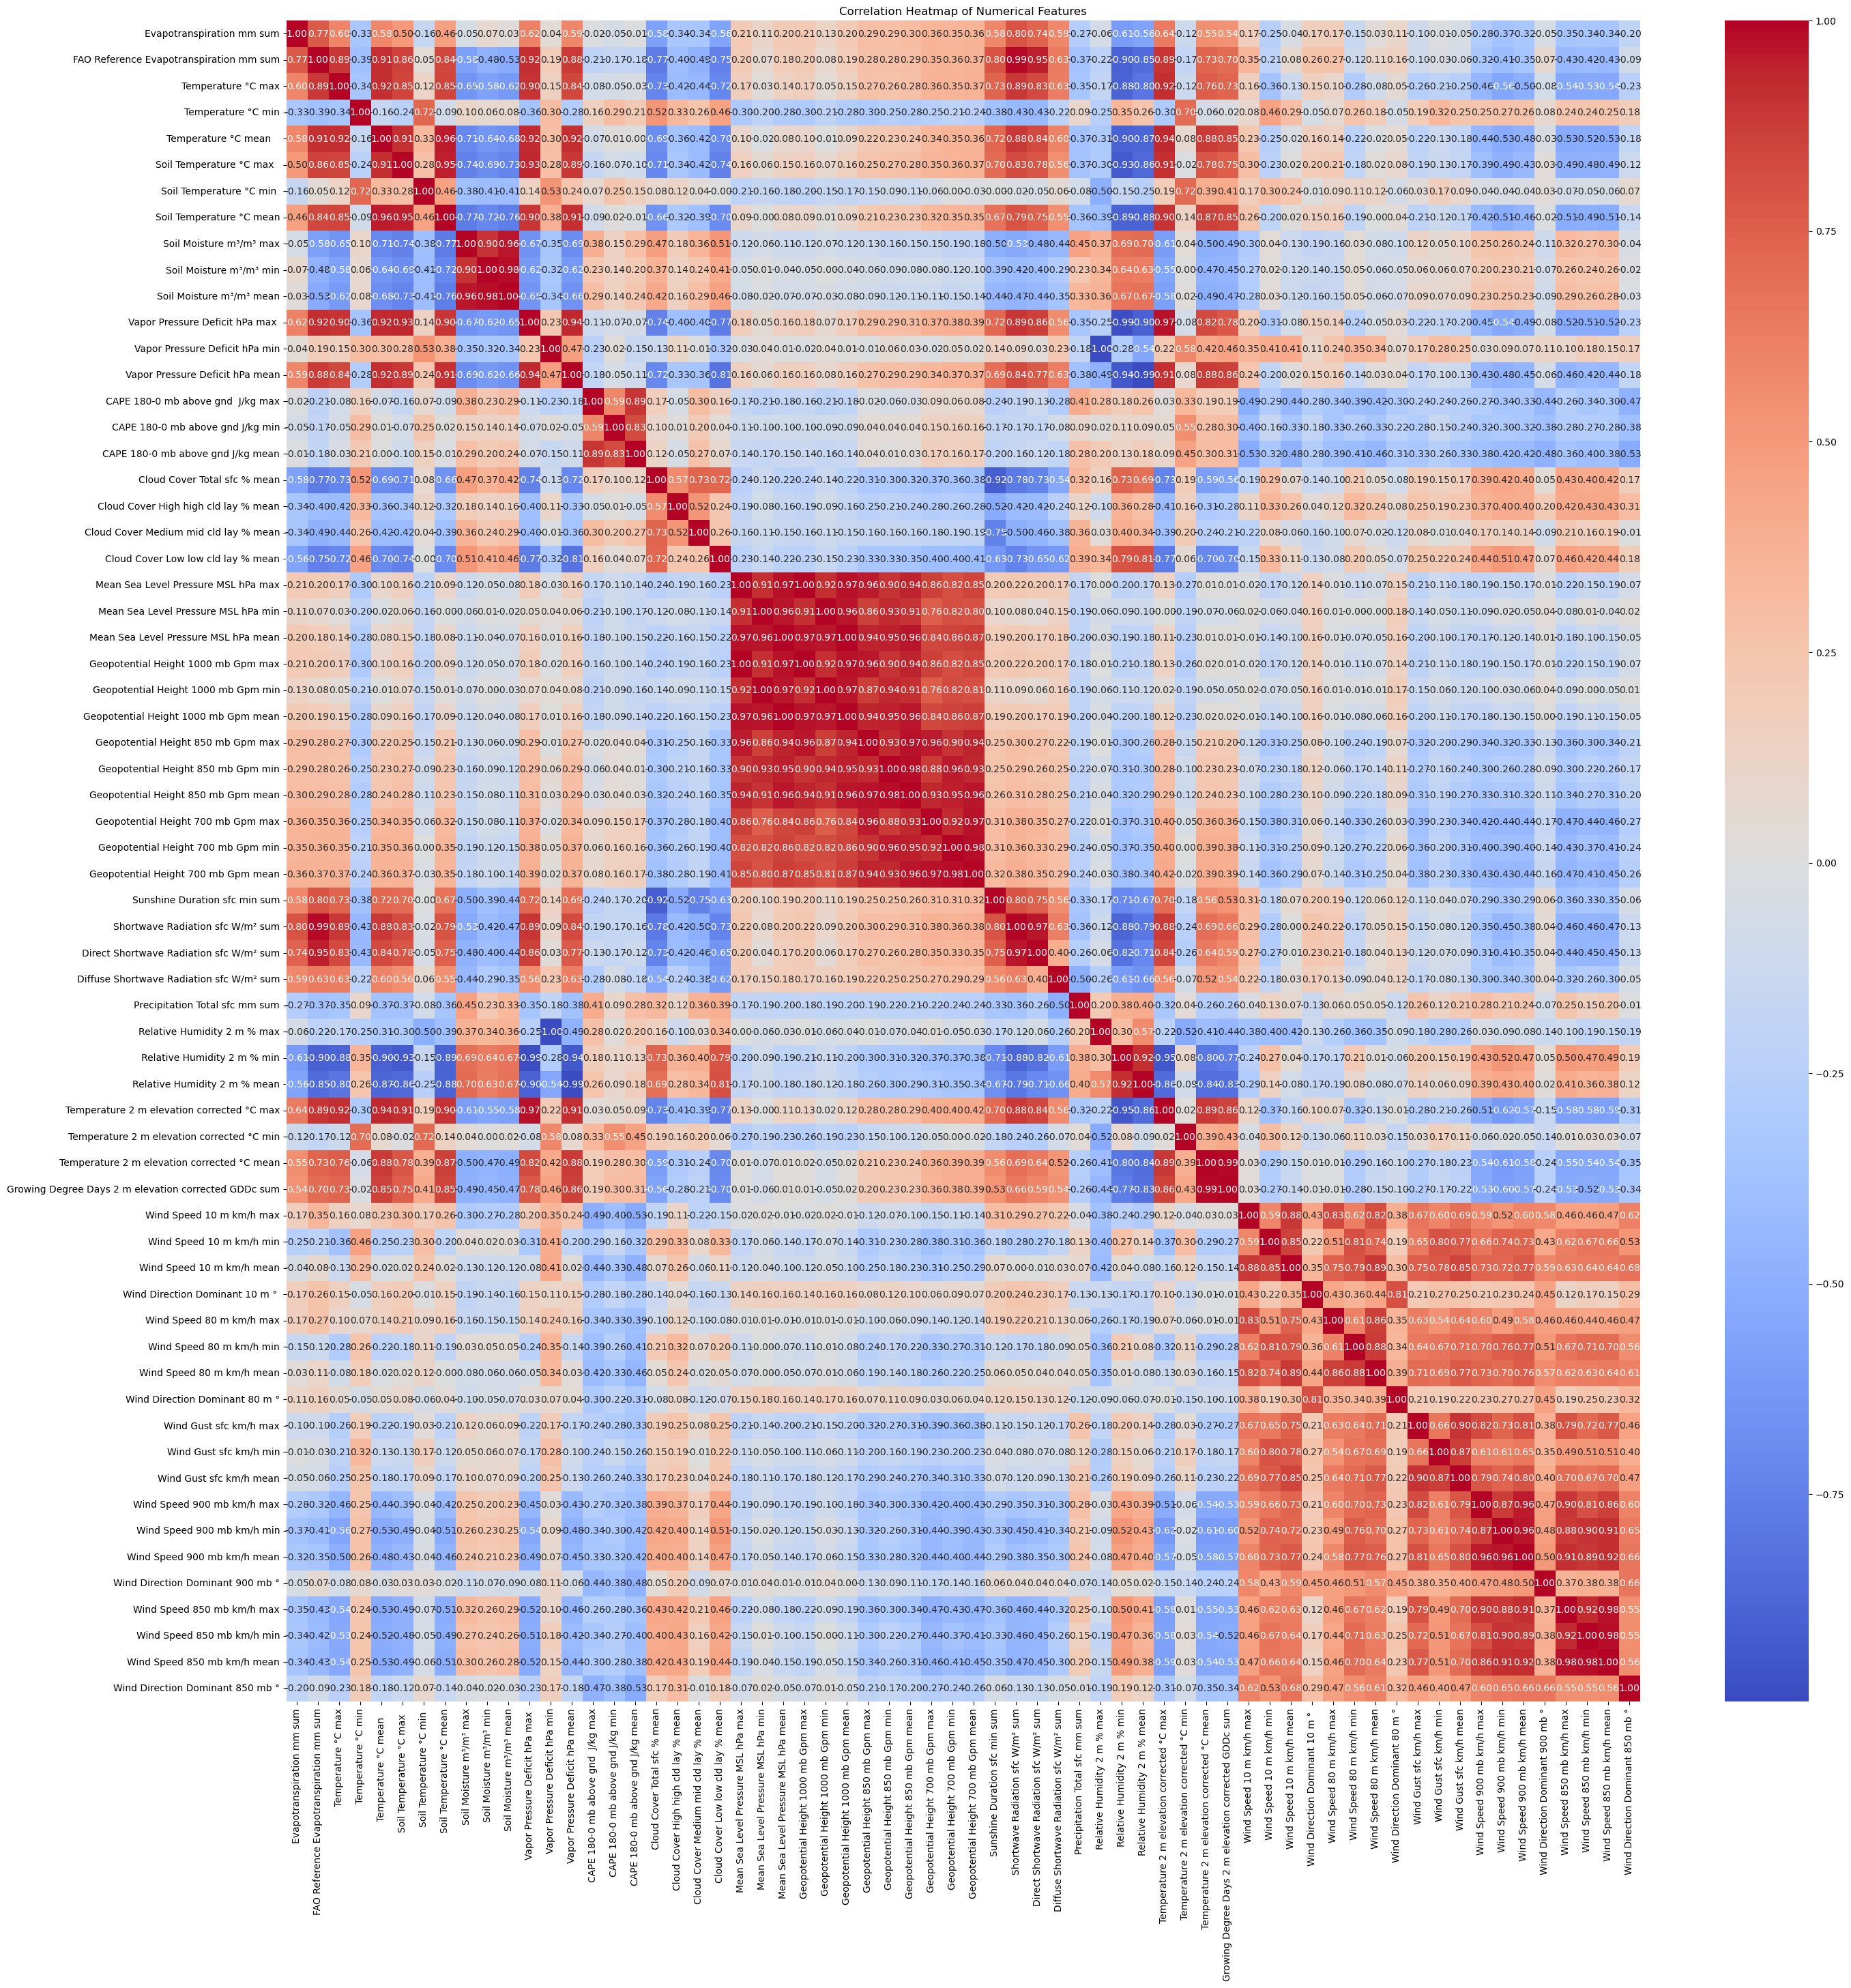

In [ ]:
# Determine the number of numerical features
num_features = len(numerical_columns.columns)

# Set figsize based on the number of features
figsize = (max(8, num_features/2), max(6, num_features/2))

# Create a heatmap
plt.figure(figsize=figsize)  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
# Extract correlation values between 'Precipitation Total sfc mm sum' and other features
precipitation_correlation = correlation_matrix['Precipitation Total sfc mm sum'].drop('Precipitation Total sfc mm sum')

# Sort correlation values in descending order
precipitation_correlation_sorted = precipitation_correlation.abs().sort_values(ascending=False)

# Print the sorted correlation values
print(precipitation_correlation_sorted)


Diffuse Shortwave Radiation sfc W/m² sum      0.498357
Soil Moisture m³/m³ max                       0.454232
CAPE 180-0 mb above gnd  J/kg max             0.406565
Relative Humidity 2 m % mean                  0.404197
Cloud Cover Low low cld lay % mean            0.385674
                                                ...   
Wind Speed 80 m km/h mean                     0.054157
Wind Speed 80 m km/h min                      0.047522
Temperature 2 m elevation corrected °C min    0.036427
Wind Speed 10 m km/h max                      0.036316
Wind Direction Dominant 850 mb °              0.013102
Name: Precipitation Total sfc mm sum, Length: 63, dtype: float64


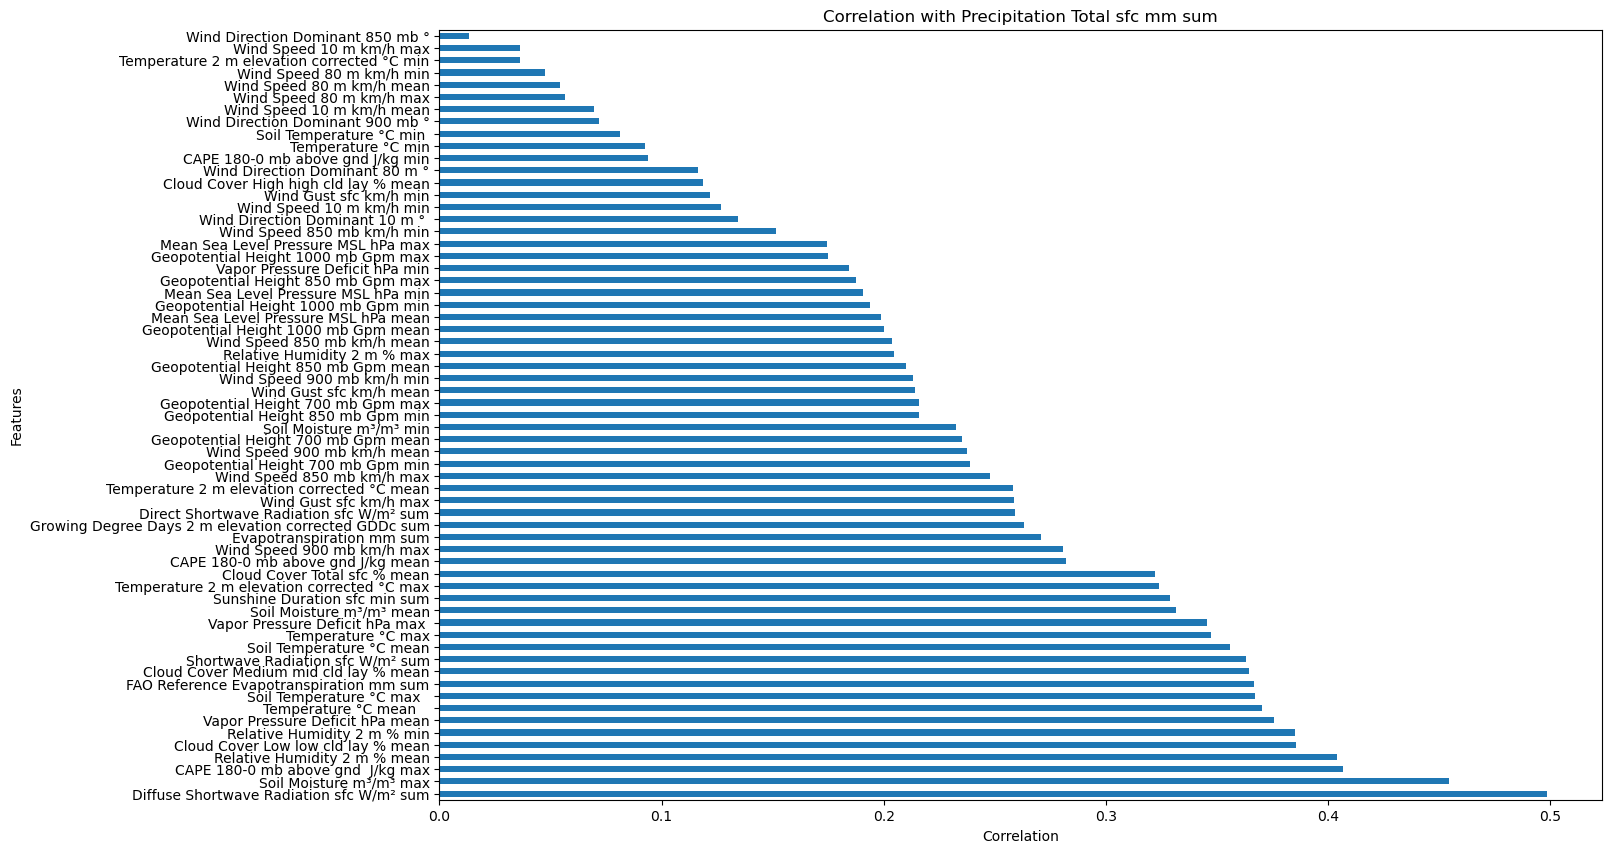

In [ ]:
plt.figure(figsize=(15, 10))
precipitation_correlation_sorted.plot(kind='barh')  # Horizontal bar chart
plt.title('Correlation with Precipitation Total sfc mm sum')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

In [ ]:
# Extract correlation values between 'Precipitation Total sfc mm sum' and other features
precipitation_correlation_1 = correlation_matrix_1['Precipitation Total sfc mm sum'].drop('Precipitation Total sfc mm sum')

# Sort correlation values in descending order
precipitation_correlation_sorted = precipitation_correlation_1.abs().sort_values(ascending=False)

# Print the sorted correlation values
print(precipitation_correlation_sorted)

Diffuse Shortwave Radiation sfc W/m² sum    0.497193
Cloud Cover Medium mid cld lay % mean       0.417849
Cloud Cover Low low cld lay % mean          0.417234
Soil Moisture m³/m³ max                     0.406415
Shortwave Radiation sfc W/m² sum            0.404154
                                              ...   
Wind Direction Dominant 900 mb °            0.038123
Wind Speed 10 m km/h max                    0.033088
Wind Direction Dominant 80 m °              0.023267
CAPE 180-0 mb above gnd J/kg min            0.022636
Wind Direction Dominant 10 m °              0.008128
Name: Precipitation Total sfc mm sum, Length: 63, dtype: float64


In [ ]:
# Define the threshold
threshold = 0.3

# Filter features with correlation values above the threshold
selected_features = precipitation_correlation_sorted[precipitation_correlation_sorted > threshold]

# Print the selected features
print("Selected features with correlation above 0.3:")
print(selected_features)


Selected features with correlation above 0.3:
Diffuse Shortwave Radiation sfc W/m² sum                0.497193
Cloud Cover Medium mid cld lay % mean                   0.417849
Cloud Cover Low low cld lay % mean                      0.417234
Soil Moisture m³/m³ max                                 0.406415
Shortwave Radiation sfc W/m² sum                        0.404154
FAO Reference Evapotranspiration mm sum                 0.401952
Relative Humidity 2 m % mean                            0.398469
Relative Humidity 2 m % min                             0.390333
Temperature °C max                                      0.388798
Sunshine Duration sfc min sum                           0.379891
Vapor Pressure Deficit hPa mean                         0.372679
Soil Temperature °C max                                 0.370310
Cloud Cover Total sfc % mean                            0.365991
Temperature °C mean                                     0.355455
Temperature 2 m elevation corrected °C max  

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# 1. Prepare the Data
X = df_filtered[selected_features.index]  # Features
y = df_filtered['Precipitation Total sfc mm sum']  # Target variable

In [ ]:
# 2. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Define the models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Iterate over models
for name, model in models.items():

    # Train the Model
    model.fit(X_train, y_train)

    # Evaluate the Model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)  # Calculate R^2
    print(f"Mean Squared Error for {name}: {mse}")
    print(f"Root Mean Squared Error for {name}: {rmse}")
    print(f"R^2 for {name}: {r2}")

Mean Squared Error for Random Forest: 15.784252839100354
Root Mean Squared Error for Random Forest: 3.9729400749445434
R^2 for Random Forest: 0.6915804139660215
Mean Squared Error for Gradient Boosting: 15.446447578119203
Root Mean Squared Error for Gradient Boosting: 3.9301968879585667
R^2 for Gradient Boosting: 0.6981810278698879
Mean Squared Error for XGBoost: 18.26788822888554
Root Mean Squared Error for XGBoost: 4.2740950187010975
R^2 for XGBoost: 0.6430509202620582


In [ ]:
df_filtered.to_csv('D:\\monsoon.csv')

In [ ]:
from scipy import stats

# Calculate Z-scores for the 'Precipitation Total sfc mm sum' column
z_scores = stats.zscore(df_filtered['Precipitation Total sfc mm sum'])

In [ ]:
threshold = 3
anomalies = df_filtered[z_scores > threshold]

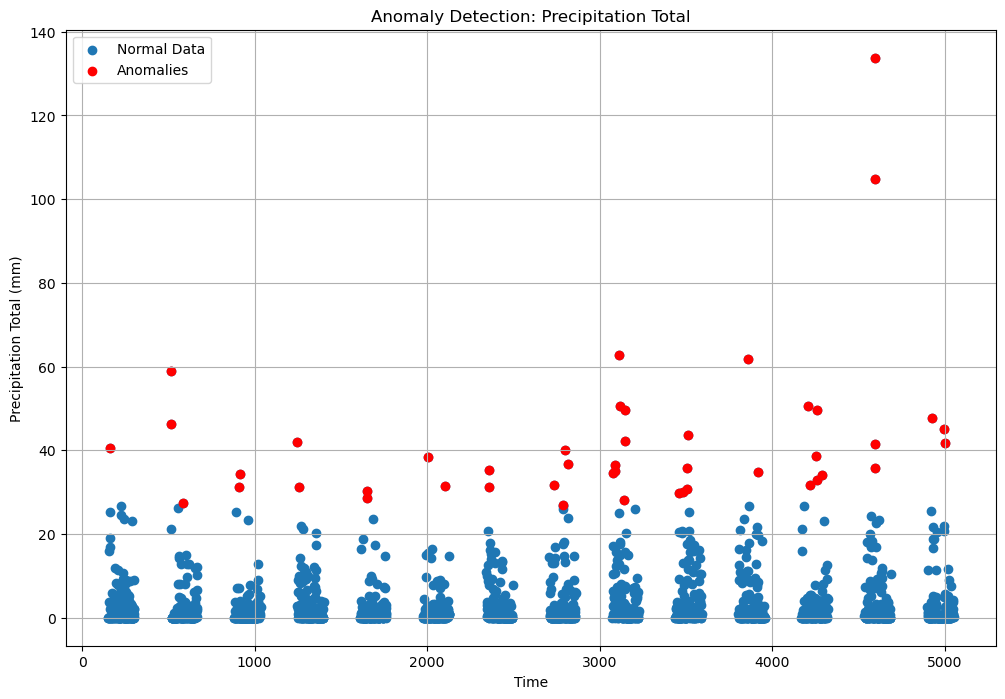

In [ ]:
# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df_filtered.index, df_filtered['Precipitation Total sfc mm sum'], label='Normal Data')
plt.scatter(anomalies.index, anomalies['Precipitation Total sfc mm sum'], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Precipitation Total (mm)')
plt.title('Anomaly Detection: Precipitation Total')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

In [ ]:
df_filtered = pd.read_csv('D:\\monsoon.csv')

In [ ]:
target = df_filtered['Precipitation Total sfc mm sum'].values

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

In [ ]:
# Define the number of time steps (e.g., 30 days) for the LSTM model
n_steps = 30

# Prepare the data for LSTM
X, y = [], []
for i in range(len(scaled_target) - n_steps):
    X.append(scaled_target[i:i + n_steps])
    y.append(scaled_target[i + n_steps])

X, y = np.array(X), np.array(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100

53/53 [==============================] - 3s 14ms/step - loss: 0.0032
Epoch 2/100
53/53 [==============================] - 1s 12ms/step - loss: 0.0031
Epoch 3/100
53/53 [==============================] - 1s 13ms/step - loss: 0.0030
Epoch 4/100
53/53 [==============================] - 1s 13ms/step - loss: 0.0030
Epoch 5/100
53/53 [==============================] - 1s 12ms/step - loss: 0.0030
Epoch 6/100
53/53 [==============================] - 1s 13ms/step - loss: 0.0030
Epoch 7/100
53/53 [==============================] - 1s 13ms/step - loss: 0.0030
Epoch 8/100
53/53 [==============================] - 1s 13ms/step - loss: 0.0030
Epoch 9/100
53/53 [==============================] - 1s 13ms/step - loss: 0.0030
Epoch 10/100
53/53 [==============================] - 1s 13ms/step - loss: 0.0029
Epoch 11/100
53/53 [==============================] - 1s 14ms/step - loss: 0.0029
Epoch 12/100
53/53 [==============================] - 1s 13ms/step - loss: 0.0029
Epoch 13/100
53/53 [===

In [ ]:
# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error: {mse}")

14/14 [==============================] - 1s 7ms/step - loss: 0.0030
Mean Squared Error: 0.003048383630812168


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


14/14 [==============================] - 0s 6ms/step
Mean Squared Error: 0.003048383715569117
Root Mean Squared Error: 0.05521216999511174


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Load the dataset
df = pd.read_csv("D:\\monsoon.csv")  # Replace "your_dataset.csv" with your actual dataset file path


# Selecting only numerical columns
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
df_numeric = df[numeric_columns]

In [ ]:
# Calculate correlations
correlation_matrix = df_numeric.corr()
target_correlation = correlation_matrix['Precipitation Total sfc mm sum'].abs()
highly_correlated_features = target_correlation[target_correlation > 0.3].index.tolist()

In [ ]:
# Selecting only highly correlated features and the target
df_filtered = df[highly_correlated_features + ['Precipitation Total sfc mm sum']]

# Assuming 'Precipitation Total sfc mm sum' is the target column
X = df_filtered.drop(columns=['Precipitation Total sfc mm sum'])
y = df_filtered['Precipitation Total sfc mm sum']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base model
base_model = DecisionTreeRegressor(random_state=42)

In [ ]:
# Define Bagging ensemble
bagging_model = BaggingRegressor(base_model, n_estimators=10, random_state=42)

# Train the Bagging model
bagging_model.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42),
                 random_state=42)

In [ ]:
# Evaluate the Bagging model
bagging_mse = mean_squared_error(y_test, bagging_model.predict(X_test))
print("Bagging Mean Squared Error:", bagging_mse)

Bagging Mean Squared Error: 18.67806742057041


In [ ]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = df_filtered.corr()

# Filter columns based on correlation with precipitation
highly_correlated_columns = correlation_matrix['Precipitation Total sfc mm sum'][correlation_matrix['Precipitation Total sfc mm sum'].abs() > 0.3].index

# Include the precipitation column
highly_correlated_data = df_filtered[highly_correlated_columns]

# Save the data to a new Excel file
highly_correlated_data.to_csv('D:\\highly_correlated_data.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('D:\\monsoon.csv')

In [ ]:
# Convert the 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Extract year from the 'Time' column and create a new column 'Year'
df['Year'] = df['Time'].dt.year

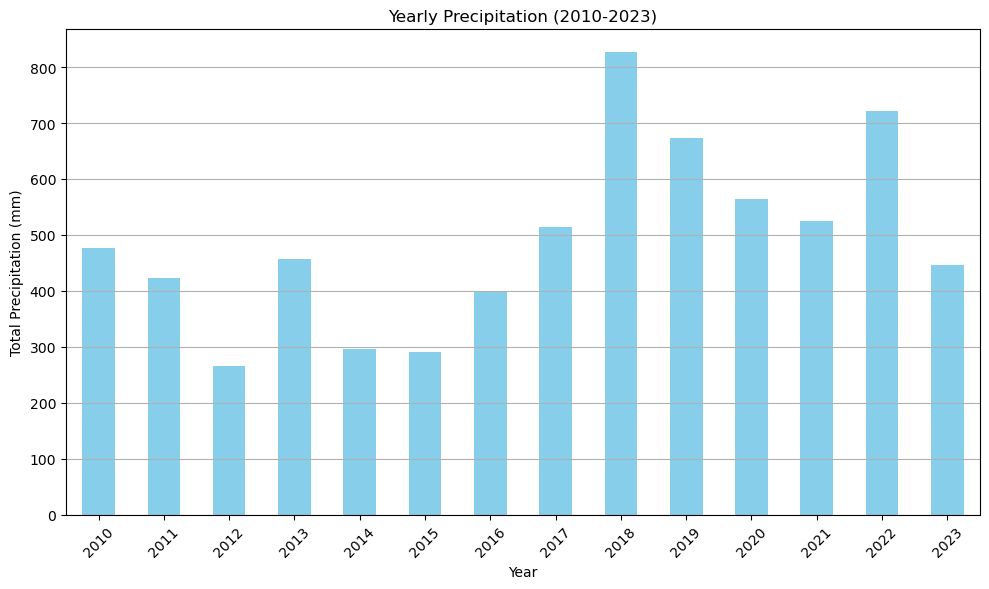

In [ ]:
# Group by year and calculate the sum of precipitation for each year
yearly_precipitation = df.groupby('Year')['Precipitation Total sfc mm sum'].sum()

# Plotting
plt.figure(figsize=(10, 6))
yearly_precipitation.plot(kind='bar', color='skyblue')
plt.title('Yearly Precipitation (2010-2023)')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate z-scores for each yearly precipitation value
z_scores = (yearly_precipitation - yearly_precipitation.mean()) / yearly_precipitation.std()

In [ ]:
# Define a threshold for identifying outliers (e.g., z-score greater than 3)
outlier_threshold = 2

# Find outlier years based on the threshold
outlier_years = z_scores[abs(z_scores) > outlier_threshold].index

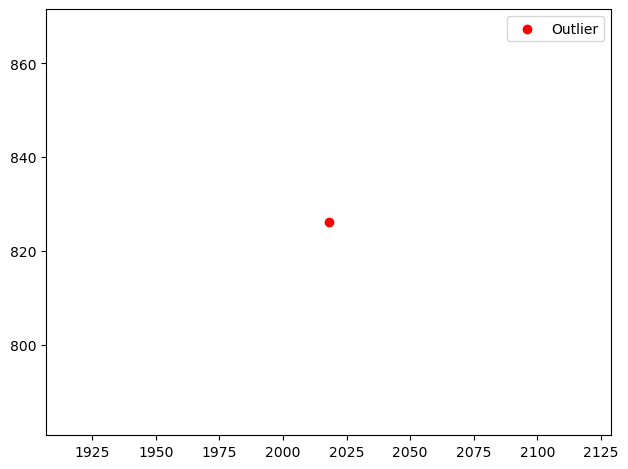

Outlier years based on z-score threshold (>|2|): Index([2018], dtype='int32', name='Year')


In [ ]:
# Highlighting outlier years
plt.scatter(outlier_years, yearly_precipitation.loc[outlier_years], color='red', label='Outlier')

plt.legend()
plt.tight_layout()
plt.show()

print("Outlier years based on z-score threshold (>|2|):", outlier_years)

In [ ]:
# Extract year and month from the 'Time' column and create new columns
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month

# Filter the dataset for the year 2018
df_2018 = df[df['Year'] == 2018]

# Group by month and calculate the sum of precipitation for each month
monthly_precipitation_2018 = df_2018.groupby('Month')['Precipitation Total sfc mm sum'].sum()

# Find the month with the highest precipitation in 2018
max_precipitation_month = monthly_precipitation_2018.idxmax()
max_precipitation_value = monthly_precipitation_2018.max()

# Print the result
print("In 2018, the month with the highest precipitation was:")
print("Month:", max_precipitation_month)
print("Precipitation amount:", max_precipitation_value, "mm")

In 2018, the month with the highest precipitation was:
Month: 7
Precipitation amount: 256.10000894 mm


In [ ]:
# Group by month and calculate the sum of precipitation for each month
monthly_precipitation_2018 = df_2018.groupby('Month')['Precipitation Total sfc mm sum'].sum()

# Find the month with the highest precipitation in 2018
max_precipitation_month = monthly_precipitation_2018.idxmax()

# Filter the dataset for the month with the highest precipitation in 2018
df_max_precipitation_month = df_2018[df_2018['Month'] == max_precipitation_month]

# Find the day with the highest precipitation in the predicted month
day_with_max_precipitation = df_max_precipitation_month.loc[df_max_precipitation_month['Precipitation Total sfc mm sum'].idxmax()]
date_with_max_precipitation = day_with_max_precipitation['Time'].strftime('%Y-%m-%d')
max_precipitation_value_day = day_with_max_precipitation['Precipitation Total sfc mm sum']

# Print the result
print("In 2018, the month with the highest precipitation was:", max_precipitation_month)
print("The day in this month with the highest precipitation was:")
print("Date:", date_with_max_precipitation)
print("Precipitation amount:", max_precipitation_value_day, "mm")

In 2018, the month with the highest precipitation was: 7
The day in this month with the highest precipitation was:
Date: 2018-07-08
Precipitation amount: 62.8 mm
